In [3]:
import pandas as pd

# Load the datasets
jp_morgan_data = pd.read_csv('/Users/kazinafis/Downloads/JP Morgan.csv')
supervisory_data = pd.read_csv('/Users/kazinafis/Downloads/2024-Table_4A_Supervisory_Severely_Adverse_Domestic.csv')

# Display the first few rows of each dataset for inspection
jp_morgan_data.head(), supervisory_data.head()


(   IDRSSD  CERT                                       NAME      CITY STNAME  \
 0  852218   628  JPMorgan Chase Bank, National Association  Columbus   Ohio   
 1  852218   628  JPMorgan Chase Bank, National Association  Columbus   Ohio   
 2  852218   628  JPMorgan Chase Bank, National Association  Columbus   Ohio   
 3  852218   628  JPMorgan Chase Bank, National Association  Columbus   Ohio   
 4  852218   628  JPMorgan Chase Bank, National Association  Columbus   Ohio   
 
          DATE   DRLNLS  YYYY_QQ  YYYYQQ Scenario.Name  ...  \
 0  2023-12-31  7616000  2023 Q4  2023Q4        Actual  ...   
 1  2023-09-30  5061000  2023 Q3  2023Q3        Actual  ...   
 2  2023-06-30  3192000  2023 Q2  2023Q2        Actual  ...   
 3  2023-03-31  1416000  2023 Q1  2023Q1        Actual  ...   
 4  2022-12-31  4292000  2022 Q4  2022Q4        Actual  ...   
 
    X10.year.Treasury.yield  BBB.corporate.yield  Mortgage.rate  Prime.rate  \
 0                      4.5                  6.2           

In [4]:
# Check data types and missing values in JP Morgan dataset
jp_morgan_info = jp_morgan_data.info()
jp_morgan_missing = jp_morgan_data.isnull().sum()

# Check data types and missing values in Supervisory Scenario dataset
supervisory_info = supervisory_data.info()
supervisory_missing = supervisory_data.isnull().sum()

jp_morgan_info, jp_morgan_missing, supervisory_info, supervisory_missing


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   IDRSSD                                      136 non-null    int64  
 1   CERT                                        136 non-null    int64  
 2   NAME                                        136 non-null    object 
 3   CITY                                        136 non-null    object 
 4   STNAME                                      136 non-null    object 
 5   DATE                                        136 non-null    object 
 6   DRLNLS                                      136 non-null    int64  
 7   YYYY_QQ                                     136 non-null    object 
 8   YYYYQQ                                      136 non-null    object 
 9   Scenario.Name                               136 non-null    object 
 10  Real.GDP.growt

(None,
 IDRSSD                                        0
 CERT                                          0
 NAME                                          0
 CITY                                          0
 STNAME                                        0
 DATE                                          0
 DRLNLS                                        0
 YYYY_QQ                                       0
 YYYYQQ                                        0
 Scenario.Name                                 0
 Real.GDP.growth                               0
 Nominal.GDP.growth                            0
 Real.disposable.income.growth                 0
 Nominal.disposable.income.growth              0
 Unemployment.rate                             0
 CPI.inflation.rate                            0
 X3.month.Treasury.rate                        0
 X5.year.Treasury.yield                        0
 X10.year.Treasury.yield                       0
 BBB.corporate.yield                           0
 Mortgage.rat

In [13]:
# Check if column renaming was not applied or needs reapplication
supervisory_data.columns = ['Scenario.Name', 'Date', 'Real.GDP.growth', 'Nominal.GDP.growth',
                            'Real.disposable.income.growth', 'Nominal.disposable.income.growth',
                            'Unemployment.rate', 'CPI.inflation.rate', '3.month.Treasury.rate',
                            '5.year.Treasury.yield', '10.year.Treasury.yield', 'BBB.corporate.yield',
                            'Mortgage.rate', 'Prime.rate', 'Dow.Jones.Total.Stock.Market.Index.Level',
                            'House.Price.Index.Level', 'Commercial.Real.Estate.Price.Index.Level',
                            'Market.Volatility.Index.Level']

# Select the required features from the renamed columns
supervisory_selected = supervisory_data[['Real.GDP.growth', 'Unemployment.rate', 'CPI.inflation.rate', 
                                         'Mortgage.rate', 'BBB.corporate.yield']]
# Display the first few rows of both datasets to ensure everything is correct
supervisory_selected.head()


,Real.GDP.growth,Unemployment.rate,CPI.inflation.rate,Mortgage.rate,BBB.corporate.yield
0,-11.6,5.6,2.3,4.0,5.8
1,-6.7,6.8,1.5,3.7,6.3
2,-8.0,8.1,1.3,3.8,6.5
3,-5.9,9.2,1.3,3.8,6.6
4,-1.8,9.7,1.4,3.8,6.4


In [15]:
# Correctly selecting columns using the exact column names
jp_morgan_selected = jp_morgan_data[['Real.GDP.growth', 'Unemployment.rate', 'CPI.inflation.rate', 'Mortgage.rate', 'BBB.corporate.yield', 'DRLNLS']]

# Display the first few rows to confirm the selection
jp_morgan_selected.head()


,Real.GDP.growth,Unemployment.rate,CPI.inflation.rate,Mortgage.rate,BBB.corporate.yield,DRLNLS
0,1.5,3.7,2.8,7.3,6.2,7616000
1,4.9,3.7,3.6,7.0,6.0,5061000
2,2.1,3.6,2.7,6.5,5.7,3192000
3,2.2,3.5,3.8,6.4,5.6,1416000
4,2.6,3.6,4.2,6.7,6.1,4292000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the features (X) and target (y) for JP Morgan data
X = jp_morgan_selected.drop('DRLNLS', axis=1)
y = jp_morgan_selected['DRLNLS']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Linear Regression model
linear_model.fit(X_train, y_train)

# Train the RandomForest model
rf_model.fit(X_train, y_train)

# Predict on the testing set for both models
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate the Mean Squared Error for both models
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_rf = mean_squared_error(y_test, y_pred_rf)

mse_linear, mse_rf


(4286362111268.1953, 4283120574782.143)

In [17]:
# Predict with the Linear Regression and RandomForest models on the Supervisory Scenario data
supervisory_predictions_linear = linear_model.predict(supervisory_selected)
supervisory_predictions_rf = rf_model.predict(supervisory_selected)

# Create a DataFrame to view the predictions from both models
predictions_df = pd.DataFrame({
    'Supervisory Scenario': supervisory_data['Date'],
    'Predictions Linear Regression': supervisory_predictions_linear,
    'Predictions RandomForest': supervisory_predictions_rf
})

predictions_df.head()


,Supervisory Scenario,Predictions Linear Regression,Predictions RandomForest
0,2024 Q1,3.077017e+06,1966010.0
1,2024 Q2,4.461285e+06,2230960.0
2,2024 Q3,5.210577e+06,2646210.0
3,2024 Q4,6.095483e+06,7463950.0
4,2025 Q1,6.562018e+06,8651760.0


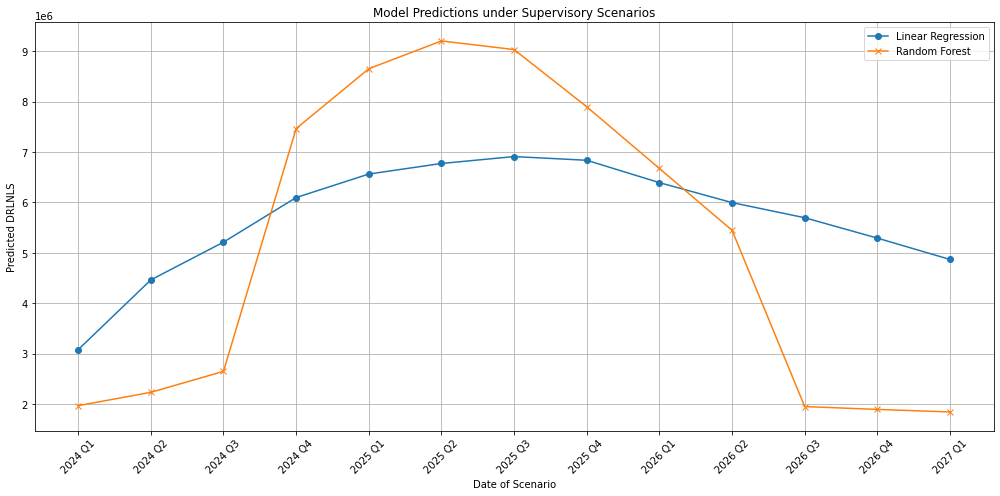

,Predictions Linear Regression,Predictions RandomForest
count,1.300000e+01,1.300000e+01
mean,5.704868e+06,5.145452e+06
std,1.113519e+06,3.106529e+06
min,3.077017e+06,1.841420e+06
25%,5.210577e+06,1.966010e+06
50%,5.995624e+06,5.446010e+06
75%,6.562018e+06,7.896770e+06
max,6.909086e+06,9.203030e+06


In [18]:
import matplotlib.pyplot as plt

# Statistical Summary of the Predictions
summary_stats = predictions_df.describe()

# Visualization of Predictions over time
plt.figure(figsize=(14, 7))
plt.plot(predictions_df['Supervisory Scenario'], predictions_df['Predictions Linear Regression'], label='Linear Regression', marker='o')
plt.plot(predictions_df['Supervisory Scenario'], predictions_df['Predictions RandomForest'], label='Random Forest', marker='x')
plt.title('Model Predictions under Supervisory Scenarios')
plt.xlabel('Date of Scenario')
plt.ylabel('Predicted DRLNLS')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

summary_stats


In [19]:
# Calculate the absolute differences between predictions of the two models
predictions_df['Difference'] = abs(predictions_df['Predictions Linear Regression'] - predictions_df['Predictions RandomForest'])

# Identify top scenarios with the largest discrepancies
top_discrepancies = predictions_df.sort_values(by='Difference', ascending=False).head()

top_discrepancies


,Supervisory Scenario,Predictions Linear Regression,Predictions RandomForest,Difference
10,2026 Q3,5.695157e+06,1948680.0,3.746477e+06
11,2026 Q4,5.290910e+06,1891430.0,3.399480e+06
12,2027 Q1,4.867360e+06,1841420.0,3.025940e+06
2,2024 Q3,5.210577e+06,2646210.0,2.564367e+06
5,2025 Q2,6.771600e+06,9203030.0,2.431430e+06


In [20]:
# Extract feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
1,Unemployment.rate,0.682953
4,BBB.corporate.yield,0.097081
3,Mortgage.rate,0.086991
2,CPI.inflation.rate,0.081204
0,Real.GDP.growth,0.051771


In [21]:
# Adjust Random Forest parameters
adjusted_rf_model = RandomForestRegressor(n_estimators=150, max_depth=10, random_state=42, min_samples_leaf=4)

# Re-train the adjusted Random Forest model
adjusted_rf_model.fit(X_train, y_train)

# Predict on the testing set with the adjusted model
adjusted_y_pred_rf = adjusted_rf_model.predict(X_test)

# Calculate the Mean Squared Error for the adjusted model
adjusted_mse_rf = mean_squared_error(y_test, adjusted_y_pred_rf)

# Display the new MSE
adjusted_mse_rf


4764509664457.274

In [22]:
# Predict with the adjusted RandomForest model on the Supervisory Scenario data
adjusted_supervisory_predictions_rf = adjusted_rf_model.predict(supervisory_selected)

# Compare the predictions from the original and adjusted models
adjusted_predictions_df = pd.DataFrame({
    'Supervisory Scenario': supervisory_data['Date'],
    'Original Predictions RandomForest': supervisory_predictions_rf,
    'Adjusted Predictions RandomForest': adjusted_supervisory_predictions_rf
})

# Display the adjusted predictions alongside the original to compare
adjusted_predictions_df.head()


,Supervisory Scenario,Original Predictions RandomForest,Adjusted Predictions RandomForest
0,2024 Q1,1966010.0,1.733474e+06
1,2024 Q2,2230960.0,2.009674e+06
2,2024 Q3,2646210.0,2.285134e+06
3,2024 Q4,7463950.0,5.839737e+06
4,2025 Q1,8651760.0,7.315294e+06


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [3, 4, 5]
}

# Setup the grid search with cross-validation
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid,
                              cv=5,  # Number of folds in cross-validation
                              scoring='neg_mean_squared_error',
                              verbose=1)

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Best parameters found
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 27 candidates, totalling 135 fits


({'max_depth': 5, 'min_samples_leaf': 4, 'n_estimators': 200},
 -2719549230907.59)

In [24]:
# Retrain the Random Forest model with the best parameters found
best_rf_model = RandomForestRegressor(n_estimators=best_params['n_estimators'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      random_state=42)

best_rf_model.fit(X_train, y_train)

# Predict on the testing set with the best model
best_y_pred_rf = best_rf_model.predict(X_test)

# Calculate the Mean Squared Error for the best model
best_mse_rf = mean_squared_error(y_test, best_y_pred_rf)

# Predict on the supervisory scenario data with the best model
best_supervisory_predictions_rf = best_rf_model.predict(supervisory_selected)

# Display the new MSE and a sample of predictions for the supervisory scenarios
best_mse_rf, best_supervisory_predictions_rf[:5]


(4689579841762.076,
 array([1740678.95906772, 1956672.47512438, 2213058.95534958,
        5822020.37664351, 7483371.8656258 ]))